In [67]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import fits
from scipy import stats, optimize
from numpy.polynomial import Polynomial

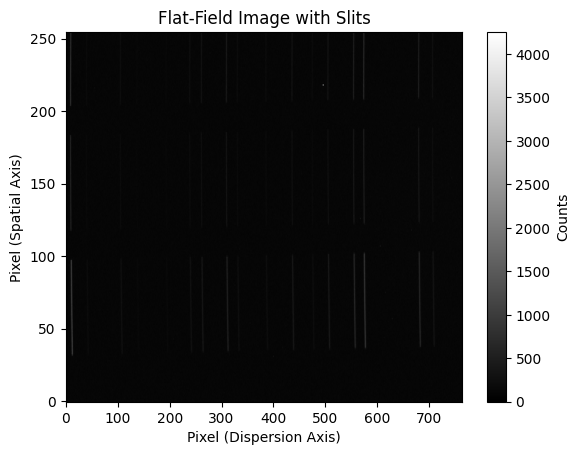

In [68]:
flat_field = fits.open('../FITS_Files/3.4_Spectropic_Neon_10_sec.00000000.FIT')
flat_data = flat_field[0].data 
# Extracts the 2D data from the first extension of the FITS file 

# Plot the image to inspect the spectra
plt.imshow(flat_data, cmap='gray', origin='lower', aspect='auto')
plt.colorbar(label='Counts')
plt.title('Flat-Field Image with Slits')
plt.xlabel('Pixel (Dispersion Axis)')
plt.ylabel('Pixel (Spatial Axis)')
plt.show()

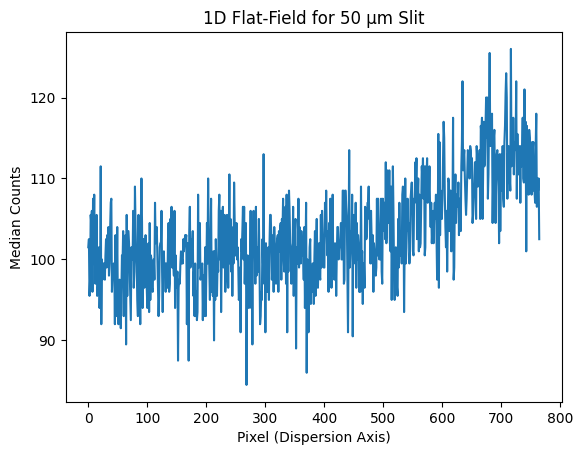

In [69]:
# Define row range for the 50 µm slit (based on the previous plot)
row_start, row_end = 100, 120  # Replace with actual pixel values

# Extract the data for the 50 µm slit
slit_data = flat_data[row_start:row_end, :]
# Slices the 2D array flat_data to only include rows between row_start and row_end 
# (corresponding to the 50 µm slit) while keeping all columns (dispersion axis).

# Takes the median of each column (along the spatial axis),
# collapse the 2D image to a 1D array where each element represents the median value of each column.
flat_1d = np.median(slit_data, axis=0)

# Plot the 1D flat-field values against pixel positions
plt.plot(flat_1d)
plt.title('1D Flat-Field for 50 µm Slit')
plt.xlabel('Pixel (Dispersion Axis)')
plt.ylabel('Median Counts')
plt.show()


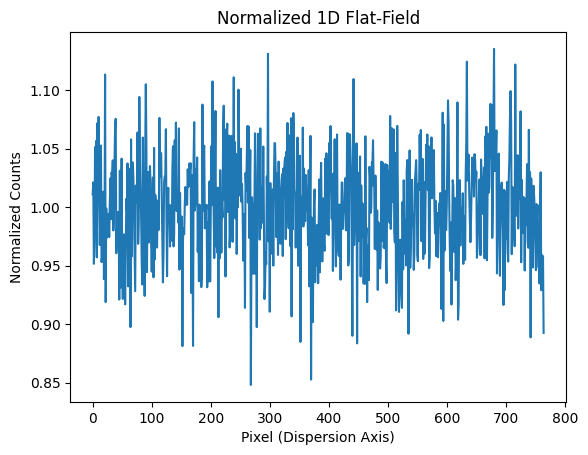

In [70]:
# Fit a low-order polynomial to the 1D flat-field data
p = Polynomial.fit(np.arange(len(flat_1d)), flat_1d, deg=3)
# np.arange(len(flat_1d)): Generates an array of pixel positions (indices).

# Evaluate the polynomial to get the fit values
fit_values = p(np.arange(len(flat_1d)))

# Normalize the 1D flat-field by dividing by the fit
normalized_flat_1d = flat_1d / fit_values

# Plot the normalized 1D flat-field
plt.plot(normalized_flat_1d)
plt.title('Normalized 1D Flat-Field')
plt.xlabel('Pixel (Dispersion Axis)')
plt.ylabel('Normalized Counts')
plt.show()

# Normalize the 2D flat-field
normalized_flat_2d = slit_data / fit_values[np.newaxis, :]


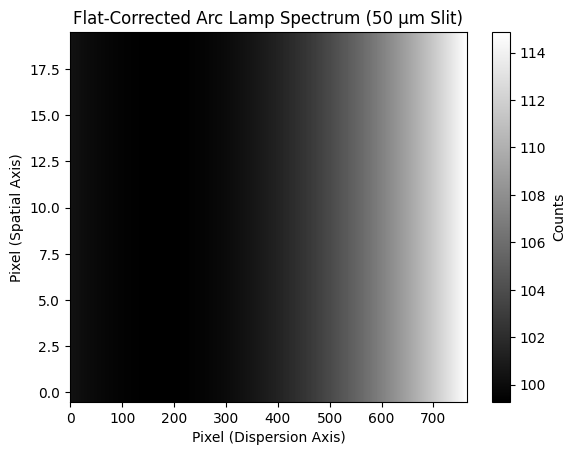

In [71]:
# Open the arc lamp spectrum
arc_lamp = fits.open('../FITS_Files/3.4_Spectropic_Neon_10_sec.00000000.FIT')
arc_data = arc_lamp[0].data

# Extract the same region for the 50 µm slit
arc_slit_data = arc_data[row_start:row_end, :]

# Apply the normalized flat-field to the arc lamp spectrum
flat_corrected_arc = arc_slit_data / normalized_flat_2d

# Plot the flat-corrected arc spectrum
plt.imshow(flat_corrected_arc, cmap='gray', origin='lower', aspect='auto')
plt.colorbar(label='Counts')
plt.title('Flat-Corrected Arc Lamp Spectrum (50 µm Slit)')
plt.xlabel('Pixel (Dispersion Axis)')
plt.ylabel('Pixel (Spatial Axis)')
plt.show()
